<a href="https://colab.research.google.com/github/RASHMI1110/COLLABORATIVE-FILTERING--MUSIC-RECOMMENDATION-SYSTEM/blob/main/TEAM_12_MLDM_case_study.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from scipy.sparse import csr_matrix

In [ ]:
#Read userid-songid-listen_count
song_info = pd.read_csv('https://static.turi.com/datasets/millionsong/10000.txt',sep='\t',header=None)
song_info.columns = ['user_id', 'song_id', 'listen_count']

#Read song  metadata
song_actual =  pd.read_csv('https://static.turi.com/datasets/millionsong/song_data.csv')
song_actual.drop_duplicates(['song_id'], inplace=True)

#Merge the two dataframes above to create input dataframe for recommender systems
songs = pd.merge(song_info, song_actual, on="song_id", how="left")

In [ ]:
songs.to_csv('songs.csv', index=False)

In [ ]:
songs.isnull().sum().sum()

0

In [ ]:
songs.head()

,user_id,song_id,listen_count,title,release,artist_name,year
0,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOAKIMP12A8C130995,1,The Cove,Thicker Than Water,Jack Johnson,0
1,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBBMDR12A8C13253B,2,Entre Dos Aguas,Flamenco Para Niños,Paco De Lucia,1976
2,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBXHDL12A81C204C0,1,Stronger,Graduation,Kanye West,2007
3,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBYHAJ12A6701BF1D,1,Constellations,In Between Dreams,Jack Johnson,2005
4,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SODACBL12A8C13C273,1,Learn To Fly,There Is Nothing Left To Lose,Foo Fighters,1999


In [ ]:
df_songs = pd.read_csv('songs.csv')

In [ ]:
#Unique songs
unique_songs = df_songs['title'].unique().shape[0]
print(f"There are {unique_songs} unique songs in the dataset")

There are 9567 unique songs in the dataset


# EDA

In [ ]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt


In [ ]:
#count how many rows we have by song, we show only the ten more popular songs 
ten_pop_songs = df_songs.groupby('title')['listen_count'].count().reset_index().sort_values(['listen_count', 'title'], ascending = [0,1])
ten_pop_songs['percentage']  = round(ten_pop_songs['listen_count'].div(ten_pop_songs['listen_count'].sum())*100, 2)

In [ ]:
ten_pop_songs = ten_pop_songs[:]

In [ ]:
ten_pop_songs 

,title,listen_count,percentage
6836,Sehr kosmisch,8277,0.41
8725,Undo,7032,0.35
1964,Dog Days Are Over (Radio Edit),6949,0.35
9496,You're The One,6729,0.34
6498,Revelry,6145,0.31
...,...,...,...
3363,Historia Del Portero,51,0.00
6782,Scared,51,0.00
2041,Don´t Leave Me Now,50,0.00
2860,Ghosts (Toxic Avenger Mix),48,0.00


In [ ]:

labels = ten_pop_songs['title'].tolist()
counts = ten_pop_songs['listen_count'].tolist()

In [ ]:

sns.barplot(x=counts, y=labels, palette='Set2')
plt.xlabel('listen_count')
plt.ylabel('song_title')

In [ ]:
#count how many rows we have by artist name, we show only the ten more popular artist 
ten_pop_artists  = df_songs.groupby(['artist_name'])['listen_count'].count().reset_index().sort_values(['listen_count', 'artist_name'], 
                                                                                                ascending = [0,1])

In [ ]:

#count how many rows we have by artist name, we show only the ten more popular artist 
ten_pop_artists  = df_songs.groupby(['artist_name'])['listen_count'].count().reset_index().sort_values(['listen_count', 'artist_name'], 
                                                                                                ascending = [0,1])

In [ ]:
ten_pop_artists = ten_pop_artists[:15]
ten_pop_artists

,artist_name,listen_count
649,Coldplay,29422
2850,The Black Keys,19862
1651,Kings Of Leon,18747
1107,Florence + The Machine,18112
1370,Jack Johnson,17801
2946,The Killers,16063
2374,Radiohead,14890
736,Daft Punk,14715
2073,Muse,14005
1554,Justin Bieber,13959


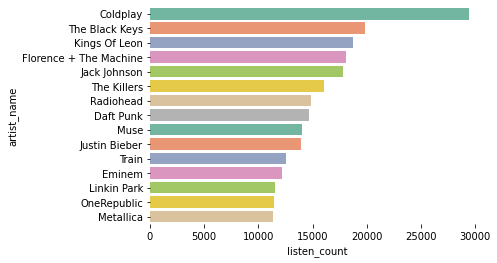

In [ ]:
plt.figure()
labels = ten_pop_artists['artist_name'].tolist()
counts = ten_pop_artists['listen_count'].tolist()
sns.barplot(x=counts, y=labels, palette='Set2')
plt.xlabel('listen_count')
plt.ylabel('artist_name')
sns.despine(left=True, bottom=True)

In [ ]:
song_user = df_songs.groupby('user_id')['song_id'].count()

In [ ]:
song_user = df_songs.groupby('user_id')['song_id'].count()

In [ ]:
listen_counts = pd.DataFrame(df_songs.groupby('listen_count').size(), columns=['count'])

In [ ]:
print(listen_counts)

                count
listen_count         
1             1138433
2              313043
3              142933
4               82569
5               93136
...               ...
683                 1
796                 1
879                 1
920                 1
2213                1

[295 rows x 1 columns]


In [ ]:
song_user = df_songs.groupby('listen_count')['song_id'].count()
print()

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


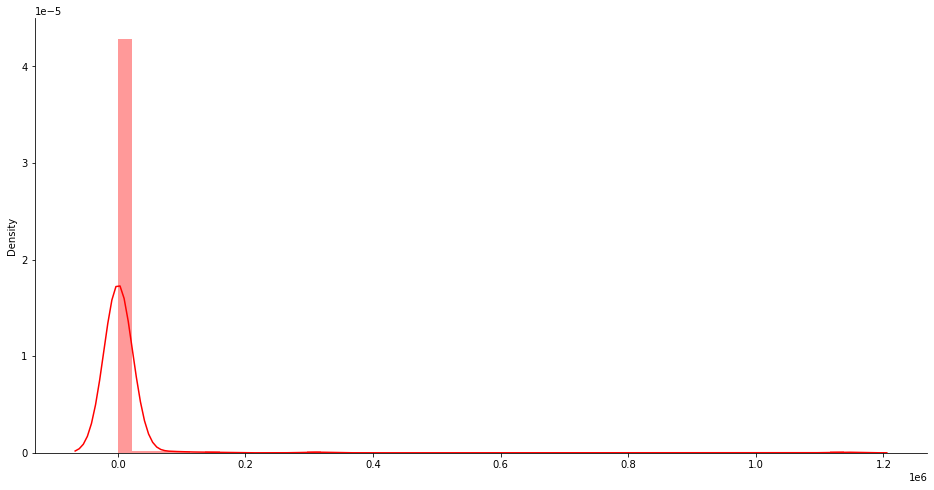

In [ ]:
plt.figure(figsize=(16, 8))
sns.distplot(song_user.values, color='red')
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.show();

In [ ]:
plt.figure(figsize=(20, 5))
sns.boxplot(x='listen_count', data=df_songs)

In [ ]:
track_metadata_df = pd.read_csv('https://static.turi.com/datasets/millionsong/song_data.csv')
count_play_df = pd.read_csv('https://static.turi.com/datasets/millionsong/10000.txt', sep='\t', header=None, names=['user','song','play_count'])

print('First sea of track metadata:')
print('Number of rows:', track_metadata_df.shape[0])
print('Number of unique songs:', len(track_metadata_df.song_id.unique()))
display(track_metadata_df.head())
print('Note the problem with repeated track metadata. Let\'s see of counts play song by users:')
display(count_play_df.shape, count_play_df.head())

First sea of track metadata:
Number of rows: 1000000
Number of unique songs: 999056


,song_id,title,release,artist_name,year
0,SOQMMHC12AB0180CB8,Silent Night,Monster Ballads X-Mas,Faster Pussy cat,2003
1,SOVFVAK12A8C1350D9,Tanssi vaan,Karkuteillä,Karkkiautomaatti,1995
2,SOGTUKN12AB017F4F1,No One Could Ever,Butter,Hudson Mohawke,2006
3,SOBNYVR12A8C13558C,Si Vos Querés,De Culo,Yerba Brava,2003
4,SOHSBXH12A8C13B0DF,Tangle Of Aspens,Rene Ablaze Presents Winter Sessions,Der Mystic,0


Note the problem with repeated track metadata. Let's see of counts play song by users:


(2000000, 3)

,user,song,play_count
0,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOAKIMP12A8C130995,1
1,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBBMDR12A8C13253B,2
2,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBXHDL12A81C204C0,1
3,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBYHAJ12A6701BF1D,1
4,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SODACBL12A8C13C273,1


In [ ]:
unique_track_metadata_df = track_metadata_df.groupby('song_id').max().reset_index()

print('Number of rows after unique song Id treatment:', unique_track_metadata_df.shape[0])
print('Number of unique songs:', len(unique_track_metadata_df.song_id.unique()))
display(unique_track_metadata_df.head())

Number of rows after unique song Id treatment: 999056
Number of unique songs: 999056


,song_id,title,release,artist_name,year
0,SOAAABI12A8C13615F,Afro Jazziac,To Birdland And Hurry,Herbie Mann,2000
1,SOAAABT12AC46860F0,Herre Gud Ditt Dyre Namn Og Ære,Som Den Gyldne Sol Frembryter,Bergen Big Band,0
2,SOAAABX12A8C13FEB2,N.Y.C. Remix,Paris Can´t Wait,Guardner,0
3,SOAAACR12A58A79456,Irresistible,Wowie Zowie,Superchumbo,2002
4,SOAAACY12A58A79663,Untitled 1,Pine Cone Temples,Thuja,0


In [ ]:
user_song_list_count = pd.merge(count_play_df, 
                                unique_track_metadata_df, how='left', 
                                left_on='song', 
                                right_on='song_id')
user_song_list_count.rename(columns={'play_count':'listen_count'},inplace=True)
del(user_song_list_count['song_id'])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:21: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:27: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


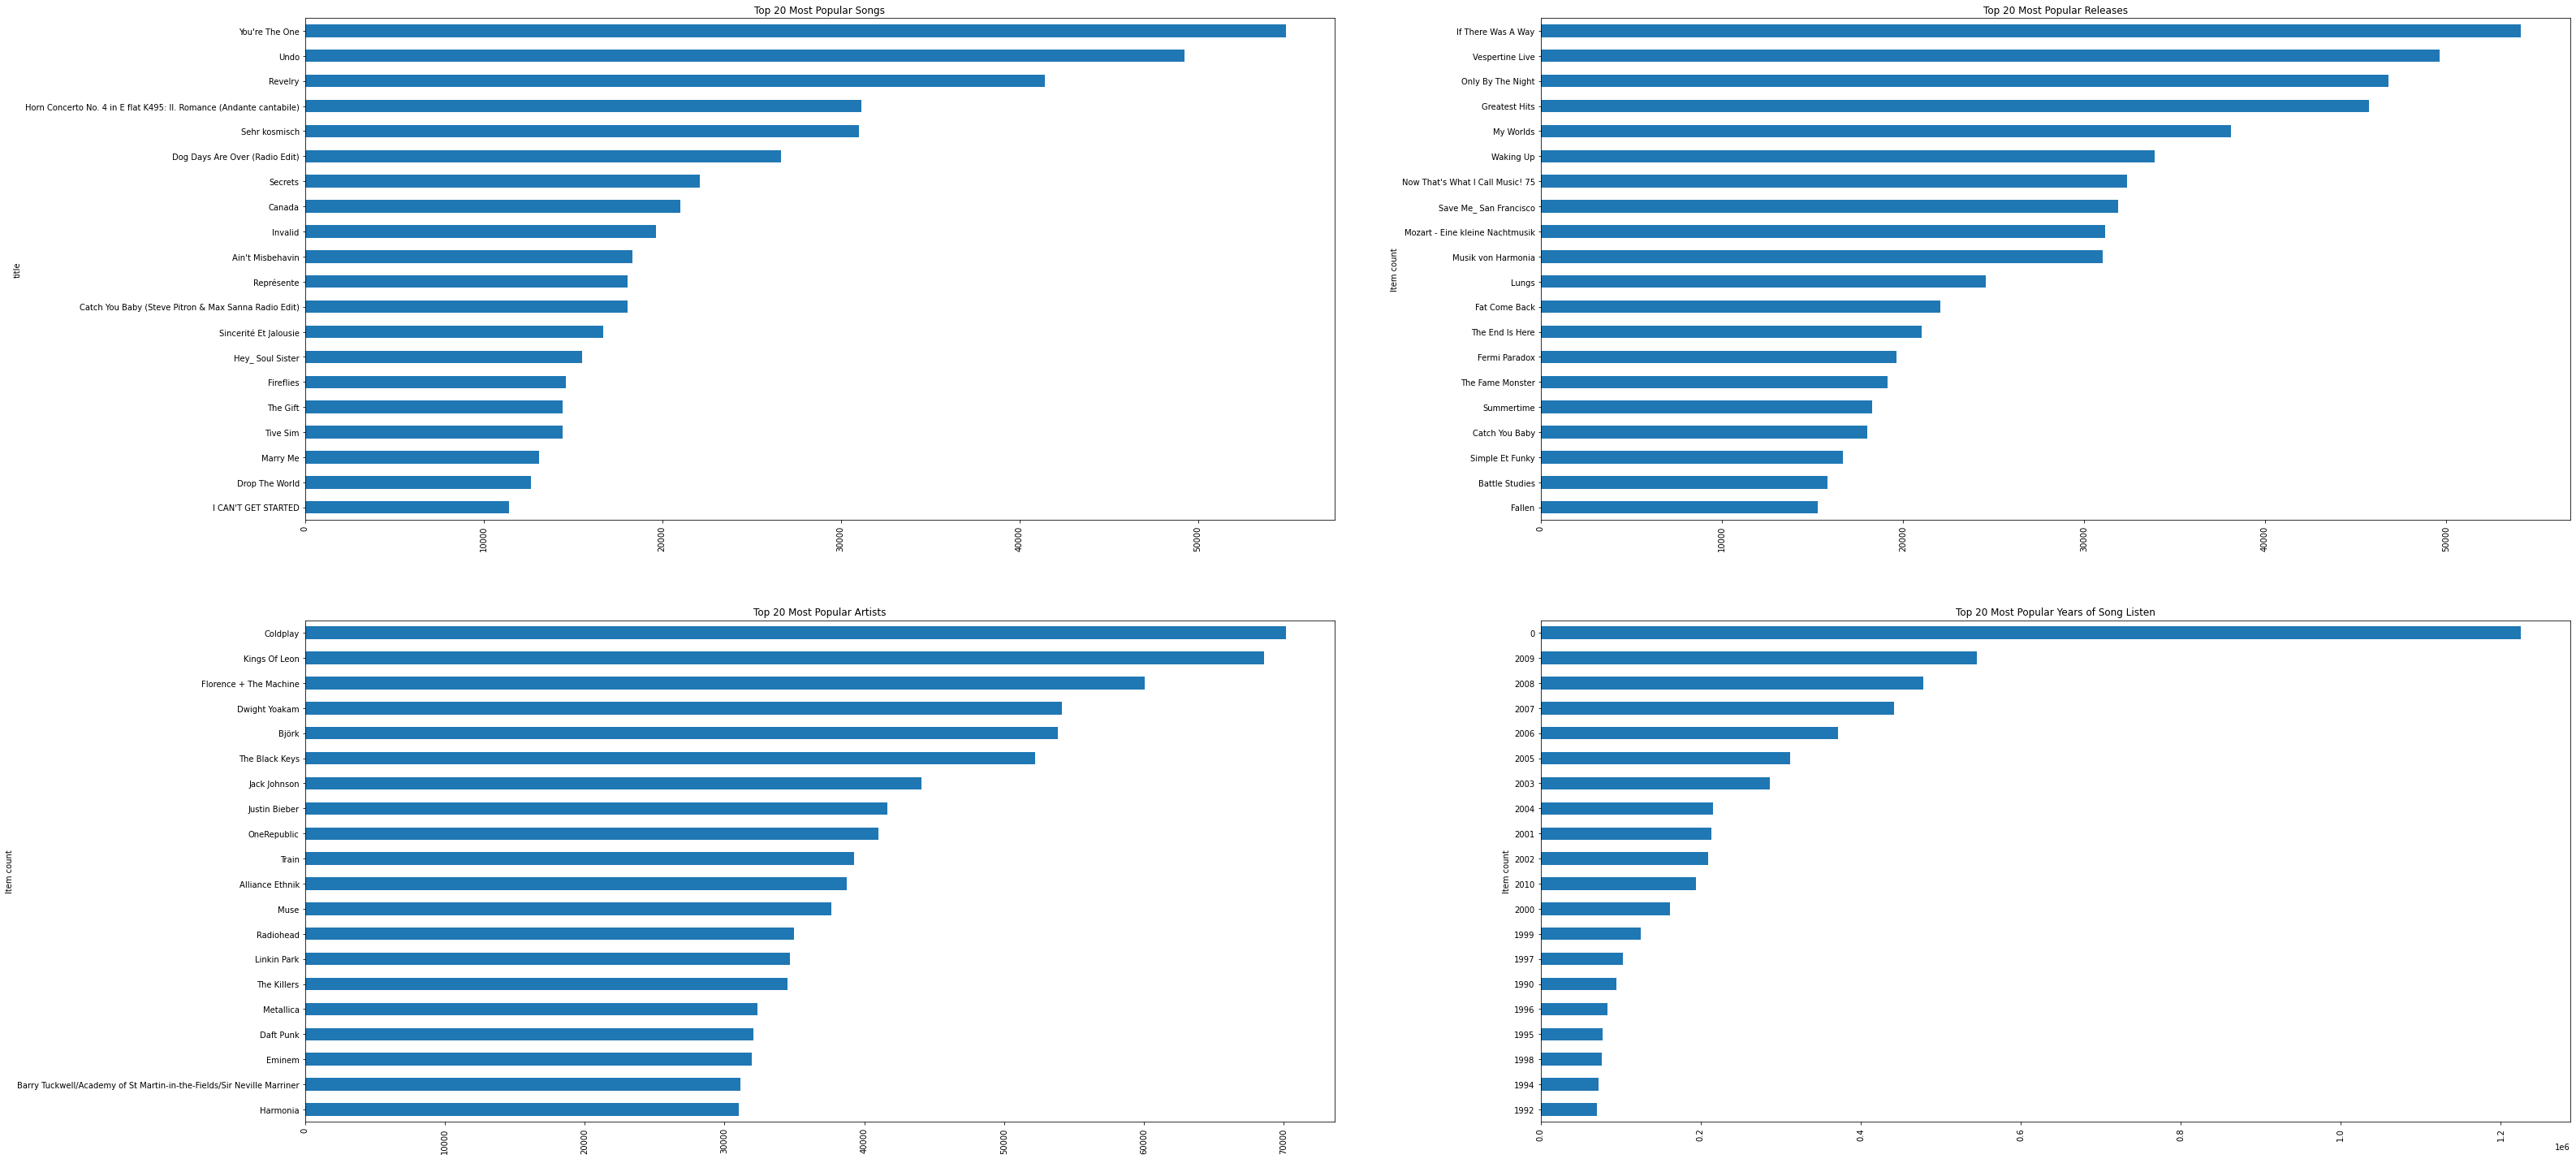

In [ ]:
fig = plt.figure(figsize=(50, 25))
a1 = fig.add_subplot(221)
popular_songs = user_song_list_count[['title','listen_count']].groupby('title').sum().\
                sort_values('listen_count', ascending=False).head(20).sort_values('listen_count')
f1 = popular_songs.plot(kind='barh', title='Top 20 Most Popular Songs', legend=False, ax=a1)
plt.xticks(rotation='vertical')
plt.ylabel('Item count')

a2 = fig.add_subplot(222)
popular_release = user_song_list_count[['release','listen_count']].groupby('release').sum().\
                sort_values('listen_count', ascending=False).head(20).sort_values('listen_count')
f2 = popular_release.plot(kind='barh', title='Top 20 Most Popular Releases', legend=False, ax=a2)
plt.xticks(rotation='vertical')
plt.ylabel('Item count')

a3 = fig.add_subplot(223)
popular_artist = user_song_list_count[['artist_name','listen_count']].groupby('artist_name').sum().\
                sort_values('listen_count', ascending=False).head(20).sort_values('listen_count')

f1 = popular_songs.plot(kind='barh', title='Top 20 Most Popular Songs', legend=False, ax=a1)
plt.xticks(rotation='vertical')
plt.ylabel('Item count')

a2 = fig.add_subplot(222)
popular_release = user_song_list_count[['release','listen_count']].groupby('release').sum().\
                sort_values('listen_count', ascending=False).head(20).sort_values('listen_count')
f2 = popular_release.plot(kind='barh', title='Top 20 Most Popular Releases', legend=False, ax=a2)
plt.xticks(rotation='vertical')
plt.ylabel('Item count')

a3 = fig.add_subplot(223)
popular_artist = user_song_list_count[['artist_name','listen_count']].groupby('artist_name').sum().\
                sort_values('listen_count', ascending=False).head(20).sort_values('listen_count')
f1 = popular_artist.plot(kind='barh', title='Top 20 Most Popular Artists', legend=False, ax=a3)
plt.xticks(rotation='vertical')
plt.ylabel('Item count')

a4 = fig.add_subplot(224)
popular_year = user_song_list_count[['year','listen_count']].groupby('year').sum().\
                sort_values('listen_count', ascending=False).head(20).sort_values('listen_count')

f1 = popular_year.plot(kind='barh', title='Top 20 Most Popular Years of Song Listen', legend=False, ax=a4)
plt.xticks(rotation='vertical')
plt.ylabel('Item count')

plt.show()                                

In [ ]:
!pip install fuzzywuzzy

# Data Preprocessing


In [ ]:
song_user = df_songs.groupby('user_id')['song_id'].count()

In [ ]:
# Get users which have listen to at least 16 songs
song_ten_id = song_user[song_user > 16].index.to_list()

In [ ]:
 #Filtered the dataset to keep only those users with more than 16 listened
df_song_id_more_ten = df_songs[df_songs['user_id'].isin(song_ten_id)].reset_index(drop=True)

In [ ]:

# convert the dataframe into a pivot table
df_songs_features = df_song_id_more_ten.pivot(index='song_id', columns='user_id', values='listen_count').fillna(0)

# obtain a sparse matrix
mat_songs_features = csr_matrix(df_songs_features.values)

In [ ]:
df_songs_features.head()

user_id,000e2c2a8c7870ff9121f212b35c8b3a20cc0e67,000ebc858861aca26bac9b49f650ed424cf882fc,000ef25cc955ad5841c915d269432eea41f4a1a5,0012bf75d43a724f62dc746d9e85ae0088a3a1d6,001322829b5dc3edc59bf78189617ddd8f23c82a,00185e316f07f0f00c325ca034be59c15b362401,0019740e3e8c24e223a6f88e3faa7c144ec5a014,001b005fe5e80d3cb45f320f5658fc8e2e72794e,001f22c638730aed5659034c447d3cf0e658898e,0021d9a4628624f6d70237f9c200ab82e766bf26,002543003041db1d049206b09426d5cdffc0f451,0028292aa536122c1f86fd48a39bd83fe582d27f,00292cf9c6d6e99c5ddbece7e37f957ab1362d25,00296f66ed7fb84c876486aecc9fab2d5809576d,0030822badc23ef6500a72ce7feda1c63faf2262,0031572620fa7f18487d3ea22935eb28410ecc4c,003412e33eb3d05573f7811c1ba61d6a15be5690,00342a0cdf56a45465f09a39040a5bc25b7d0046,00388e5764c59488ec06a109c88b39f59a2b6361,0039bd8483d578997718cdc0bf6c7c88b679f488,003ac50a4e6ed0c9085fecb7a1738730e7ea4942,003bfb50126f91f6389aaee733f5b3e0a8d5cbe0,003d0f3aac94fd261bb74c0124a90750579972d4,003d21762b29fe2ffe20fb9a51eb1e02ebeb3242,003d6d799d58e1fce362f5f4f6c7bcc26c8f3546,003e3919f41dbb8ff05a75623d205f6abcede4fc,003f1064ed75d1156352cd89b25fb752bcc10b13,003f1e939952a57d1a5bc990727acad5ceea97b4,00409f6a83c2bf4299ab6ae2dea958050537b5a9,0041925615557845642a7b1257fdc6229fe1ee5d,00454c72c0b4b99f9cc81ba0b1989597a43669d6,0045c60d98ced5efb3cbf1e0b4b7de1da3f1a506,00488ec44caa0d2fa669780f8cb604bf39e94392,004c7be9336ca88824e1e0b09ef9a2168200fa33,004dc9f93f5ad4a75f9a3ba0da5dd887b31d6bd2,004f6065fa9840913f62e52d94d9c29ea1d26fe1,004fcdf8829d68f4e45ef846ad9f308c4493ed8e,0051a2e7b452e3dc67f48688442032df557897f4,00544d8bde0d7985e8d703c1eb676d41cad33c67,00546de8971645143eead323561d0298d5b0f2be,...,ffb63da2222280f299a7a896edea073728aab343,ffb7096f3eeee706825b4a8c3fab98ce0e0b4216,ffb8299fcb3f31716c93fb8a77dee0d1dbb210f9,ffba3563fd590a51dabc1dfcb8a27119e6035241,ffbc58b89c81227a08ee05d90259bdd9172b9479,ffbe437f18c3bea5c78596c5f3183ee62d440b6c,ffc2563e7dd136bf371371cd21f0cc404a1d7499,ffc564b85d81f0ea427cee3eea2415cc2fc5c4be,ffc5b3bd0575330eb8c4ae4f3b9cabd3ba315dbb,ffc66b4520671da6b2a67a0326201565160d9650,ffc9966885909a0b42493b2558be9dc451317488,ffcc2cff250ea22471df09e76f59e2be0debae72,ffcfb0b34a47fdf55b3d96c1799cd196677f8261,ffd1d617221f5bf00de80ee3eb5d2a17fc8d077d,ffd25d7da8b4e54ea2cde25dd3b52d0e0aef7a5d,ffd458f903d49854685cf4540245c1d297e8bafa,ffd6f34b343cee62cd7dbbf20fb1ab1119b299e5,ffda2736b2204ece3b19e941caacad4106d00ed5,ffdaab327f2fc6b9fa01a4e3e7f41fdd0e468046,ffdb5557e4e24da051ebd6b45ec18c524c55dc40,ffdbaeb5cf2081eb34053a655c20f57524de11ba,ffde97c0d23bf5ce249ce73e630ccb4e7293cc32,ffe2a7e7b6689071f8c699d944b52ce590ae4636,ffe33dce4e652a4dc4824cc39680a9f709cfdfb3,ffebfec313fd515a11faba060b022f030b57fac0,ffecbb84f3dde31b0b2e64d70b7b7e5092bf7427,ffef9c3e59ab44554a9775af5e3b2ac149111bb6,fff03efd1550136063389fa71125194614e1c68f,fff0b1ab076f0b71cbde9c7dcbcfca400708d845,fff22417a61c1ba3ee2592b22a052ed6a27a8e91,fff300cd094fe04030b79fae550dc9d065190182,fff4676dacb2e9a7217702f62ee70e88aa512ecc,fff4e1a7dacbe9c13051c08f09bf66d76cbee35e,fff543db7918cb8f4f56f7470903eb2f1d5a6dd8,fff6c30c773e6ffafcac213c9afd9666afaf6d63,fffb701ee87a32eff67eb040ed59146121f01571,fffc0df75a48d823ad5abfaf2a1ee61eb1e3302c,fffce9c1537fbc350ea68823d956eaa8f5236dbe,fffd9635b33f412de8ed02e44e6564e3644cf3c6,fffea3d509760c984e7d40789804c0e5e289cc86
song_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
SOAAAGQ12A8C1420C8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
SOAACPJ12A81C21360,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0

In [ ]:
df_unique_songs = df_songs.drop_duplicates(subset=['song_id']).reset_index(drop=True)[['song_id', 'title']]

In [ ]:
decode_id_song = {
    song: i for i, song in 
    enumerate(list(df_unique_songs.set_index('song_id').loc[df_songs_features.index].title))
}

# KNN Model

In [ ]:
from sklearn.neighbors import NearestNeighbors
from fuzzywuzzy import fuzz
import numpy as np                               #USING KNN ALGORITHM

class Recommender:
    def __init__(self, metric, algorithm, k, data, decode_id_song):
        self.metric = metric
        self.algorithm = algorithm
        self.k = k
        self.data = data
        self.decode_id_song = decode_id_song
        self.data = data
        self.model = self._recommender().fit(data)
    
    def make_recommendation(self, new_song, n_recommendations):
        recommended = self._recommend(new_song=new_song, n_recommendations=n_recommendations)
        print("... Done")
        return recommended 
    
    def _recommender(self):
        return NearestNeighbors(metric=self.metric, algorithm=self.algorithm, n_neighbors=self.k, n_jobs=-1)
    
    def _recommend(self, new_song, n_recommendations):
        # Get the id of the recommended songs
        recommendations = []
        recommendation_ids = self._get_recommendations(new_song=new_song, n_recommendations=n_recommendations)
        # return the name of the song using a mapping dictionary
        recommendations_map = self._map_indeces_to_song_title(recommendation_ids)
        # Translate this recommendations into the ranking of song titles recommended
        for i, (idx, dist) in enumerate(recommendation_ids):
            recommendations.append(recommendations_map[idx])
        return recommendations
                 
    def _get_recommendations(self, new_song, n_recommendations):
        # Get the id of the song according to the text
        recom_song_id = self._fuzzy_matching(song=new_song)
        # Start the recommendation process
        print(f"Starting the recommendation process for {new_song} ...")
        # Return the n neighbors for the song id
        distances, indices = self.model.kneighbors(self.data[recom_song_id], n_neighbors=n_recommendations+1)
        return sorted(list(zip(indices.squeeze().tolist(), distances.squeeze().tolist())), key=lambda x: x[1])[:0:-1]
    
    def _map_indeces_to_song_title(self, recommendation_ids):
        # get reverse mapper
        return {song_id: song_title for song_title, song_id in self.decode_id_song.items()}
    
    def _fuzzy_matching(self, song):
        match_tuple = []
        # get match
        for title, idx in self.decode_id_song.items():
            ratio = fuzz.ratio(title.lower(), song.lower())
            if ratio >= 60:
                match_tuple.append((title, idx, ratio))
        # sort
        match_tuple = sorted(match_tuple, key=lambda x: x[2])[::-1]
        if not match_tuple:
            print(f"The recommendation system could not find a match for {song}")
            return
        return match_tuple[0][1]

/usr/local/lib/python3.6/dist-packages/fuzzywuzzy/fuzz.py:11: UserWarning: Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning
  warnings.warn('Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning')


#Recommendation

In [ ]:
# KNN model
model = Recommender(metric='cosine', algorithm='brute', k=20, data=mat_songs_features, decode_id_song=decode_id_song)

In [ ]:
#input song
song = 'Blow Up The Outside World'

In [ ]:
#getting song recomendations
new_recommendations = model.make_recommendation(new_song=song, n_recommendations=10)

Starting the recommendation process for Blow Up The Outside World ...
... Done


In [ ]:
print(f"Listener  who listens to  the song \" {song} \" also likes to listen  following songs :")

for i in new_recommendations:
  print(i)

Listener  who listens to  the song " Blow Up The Outside World " also likes to listen  following songs :
Bittersweet Memories
Flutter Girl
Touch_ Peel And Stand
Silvergun Superman (LP Version)
Flower
Lounge Fly (LP Version)
Wasting My Time
Unglued (LP Version)
Sludge Factory
It's Not What


# SVD

In [ ]:
!pip install surprise

     |████████████████████████████████| 11.8MB 2.5MB/s 
  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.1-cp36-cp36m-linux_x86_64.whl size=1670940 sha256=f560ae56ccc8e8c0ac1bb666d4864ea4ccec160b9d204dd502ad982b8949df7c
  Stored in directory: /root/.cache/pip/wheels/78/9c/3d/41b419c9d2aff5b6e2b4c0fc8d25c538202834058f9ed110d0
Successfully built scikit-surprise


In [ ]:
from surprise import SVD
from surprise import Dataset, Reader
from surprise import accuracy
from surprise.model_selection import train_test_split
from surprise.model_selection import GridSearchCV
from surprise.model_selection import cross_validate

In [ ]:
# Get how many songs each user have listened to
user_counts = df_songs.groupby('user_id')['song_id'].count()

# Filter users which have listen to at least 16 songs
user_ten_id = user_counts[user_counts > 16].index.to_list()

In [ ]:
# Filtered the dataset to keep only those users with more than 16 listened
df_song_reduced = df_songs[(df_songs['user_id'].isin(user_ten_id)) & (df_songs['song_id'].isin(song_ten_id))].reset_index(drop=True)

In [ ]:
bins = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

In [ ]:
df_song_reduced['listen_count'] = pd.cut(df_song_reduced['listen_count'], bins=bins, labels=[1, 2, 3, 4, 5, 6, 7, 8, 9, 10])

In [ ]:
listen_counts = pd.DataFrame(df_song_reduced.groupby('listen_count').size(), columns=['count']).reset_index(drop=False)

In [ ]:
reader = Reader(rating_scale=(1, 10))
data = Dataset.load_from_df(df_song_reduced[['user_id', 'song_id', 'listen_count']], reader)

In [ ]:

trainset, testset = train_test_split(data, test_size=.25)

In [ ]:
param_grid = {'n_factors': [100,160], 
              'n_epochs': [50,100], 
              'lr_all': [0.001, 0.005],
              'reg_all': [0.08, 0.1]}

In [ ]:
grid_search_svd = GridSearchCV(SVD, param_grid, measures=['rmse'], cv=3, joblib_verbose=4, n_jobs=2)

In [ ]:

# find the best parameters for the model
grid_search_svd.fit(data)
find_algo = grid_search_svd.best_estimator['rmse']
print(grid_search_svd.best_score['rmse'])
print(grid_search_svd.best_params['rmse'])

[Parallel(n_jobs=-2)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-2)]: Done   1 out of   1 | elapsed:  4.8min remaining:    0.0s
[Parallel(n_jobs=-2)]: Done   2 out of   2 | elapsed:  9.5min remaining:    0.0s
[Parallel(n_jobs=-2)]: Done   3 out of   3 | elapsed: 14.2min remaining:    0.0s


2.1996067129903523
{'n_factors': 160, 'n_epochs': 100, 'lr_all': 0.005, 'reg_all': 0.1}


[Parallel(n_jobs=-2)]: Done  12 out of  12 | elapsed: 56.7min finished


In [ ]:
# Perform the cross validation
cross_validate(find_algo, data, measures=['RMSE'], cv=5, verbose=True)

Evaluating RMSE of algorithm SVD on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    2.1658  2.1810  2.1772  2.1799  2.1698  2.1748  0.0059  
Fit time          334.37  335.66  333.85  335.12  337.70  335.34  1.33    
Test time         3.10    1.62    3.13    1.68    1.64    2.23    0.72    


{'fit_time': (334.3688313961029,
  335.6623156070709,
  333.85424637794495,
  335.1211287975311,
  337.70438146591187),
 'test_rmse': array([2.1658137 , 2.181025  , 2.17724714, 2.17990627, 2.16981538]),
 'test_time': (3.1031596660614014,
  1.616166353225708,
  3.128204584121704,
  1.679558277130127,
  1.6394603252410889)}

In [ ]:
final_algorithm = SVD(n_factors=160, n_epochs=100, lr_all=0.005, reg_all=0.1)
final_algorithm.fit(trainset)
test_predictions = final_algorithm.test(testset)
print(f"The RMSE is {accuracy.rmse(test_predictions, verbose=True)}")

RMSE: 2.1837
The RMSE is 2.1836526275536956
